In [69]:
library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)
library(repr)

In [70]:
# Lendo os arquivos CSV
alexnet <- read_csv("/kaggle/input/resultados-dos-modelos/resultados_do_modelo_AlexNet.csv", show_col_types = FALSE)
squeezenet <- read_csv("/kaggle/input/resultados-dos-modelos/resultados_do_modelo_SqueezeNet1_0.csv", show_col_types = FALSE)
resnet <- read_csv("/kaggle/input/resultados-dos-modelos/resultados_do_modelo_ResNet18.csv", show_col_types = FALSE)
vit <- read_csv("/kaggle/input/resultados-dos-modelos/resultados_do_modelo_ViT B_16.csv", show_col_types = FALSE)

In [71]:
# Combinando os dados
resultados <- bind_rows(alexnet, squeezenet, resnet, vit)
resultados

modelo,epocas,tempo_total,acuracia,precisao,revocacao,f1_macro
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AlexNet,10,211.87,0.8961,0.8980,0.8961,0.8954
SqueezeNet1_0,10,226.59,0.8055,0.8255,0.8055,0.7982
ResNet18,10,290.04,0.9391,0.9477,0.9391,0.9407
ViT B/16,10,1785.49,0.9219,0.9239,0.9219,0.9222


In [72]:
options(repr.plot.width = 10, repr.plot.height = 9)

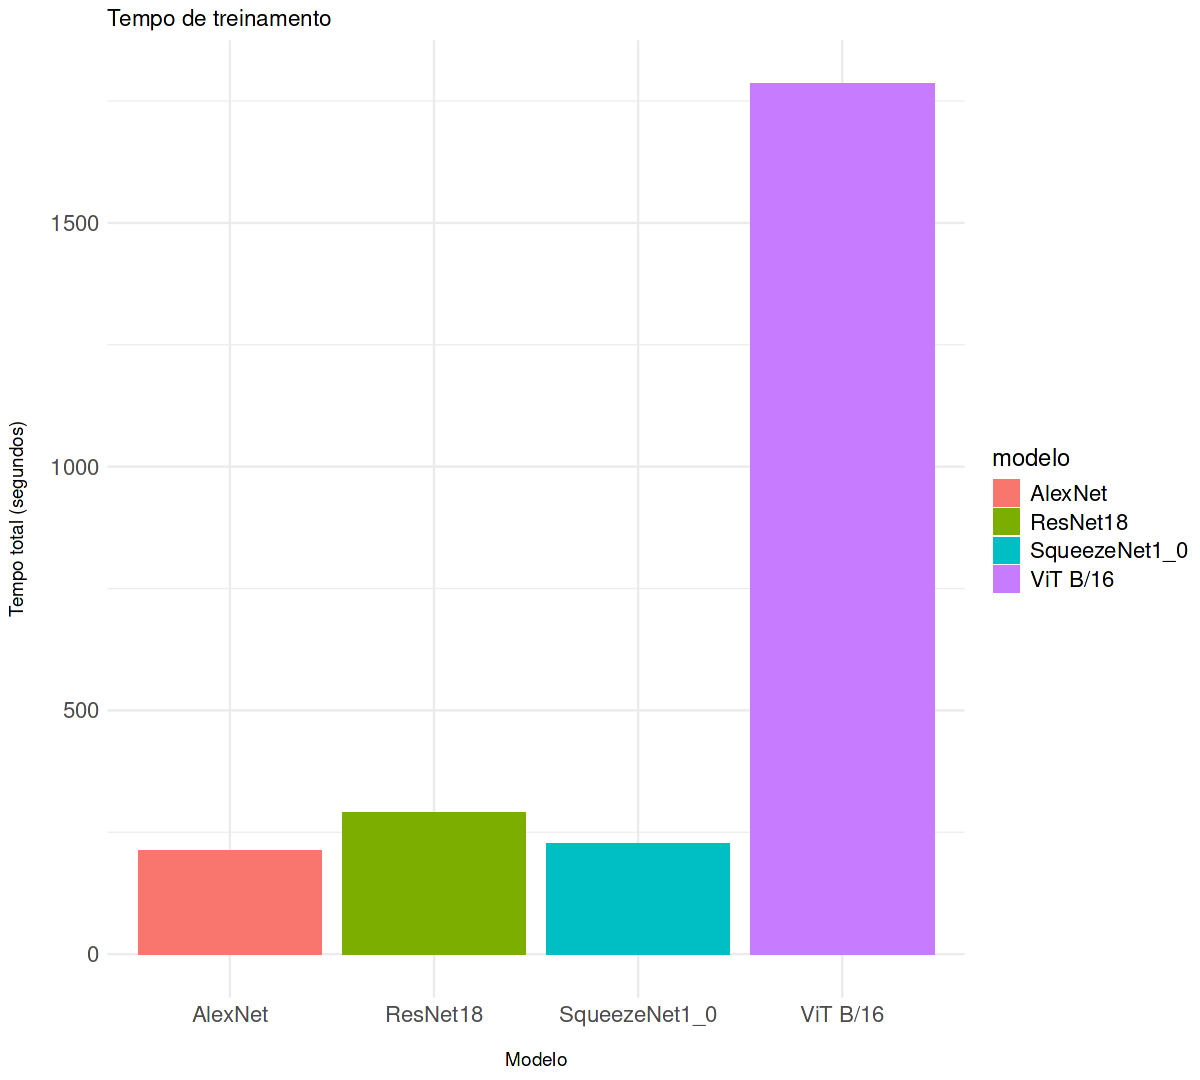

In [73]:
ggplot(resultados, aes(x = modelo, y = tempo_total, fill = modelo)) +
    geom_col() +
    #scale_fill_grey(start = 0.8, end = 0.2) +
    theme_minimal() +
    labs(title = "Tempo de treinamento", y = "Tempo total (segundos)\n", x = "\nModelo") +
    theme(
        axis.text.x = element_text(size = 13), # tamanho da fonte de eixo x
        axis.text.y = element_text(size = 13), # tamanho da fonte do eixo y
        legend.text = element_text(size = 13), # tamanho da fonte da legenda
        legend.title = element_text(size = 14) # tamanho do título da legenda
        )

In [74]:
resultados_long <- resultados %>%
    pivot_longer(cols = c(acuracia, f1_macro),
                names_to = "metrica",
                values_to = "valor")

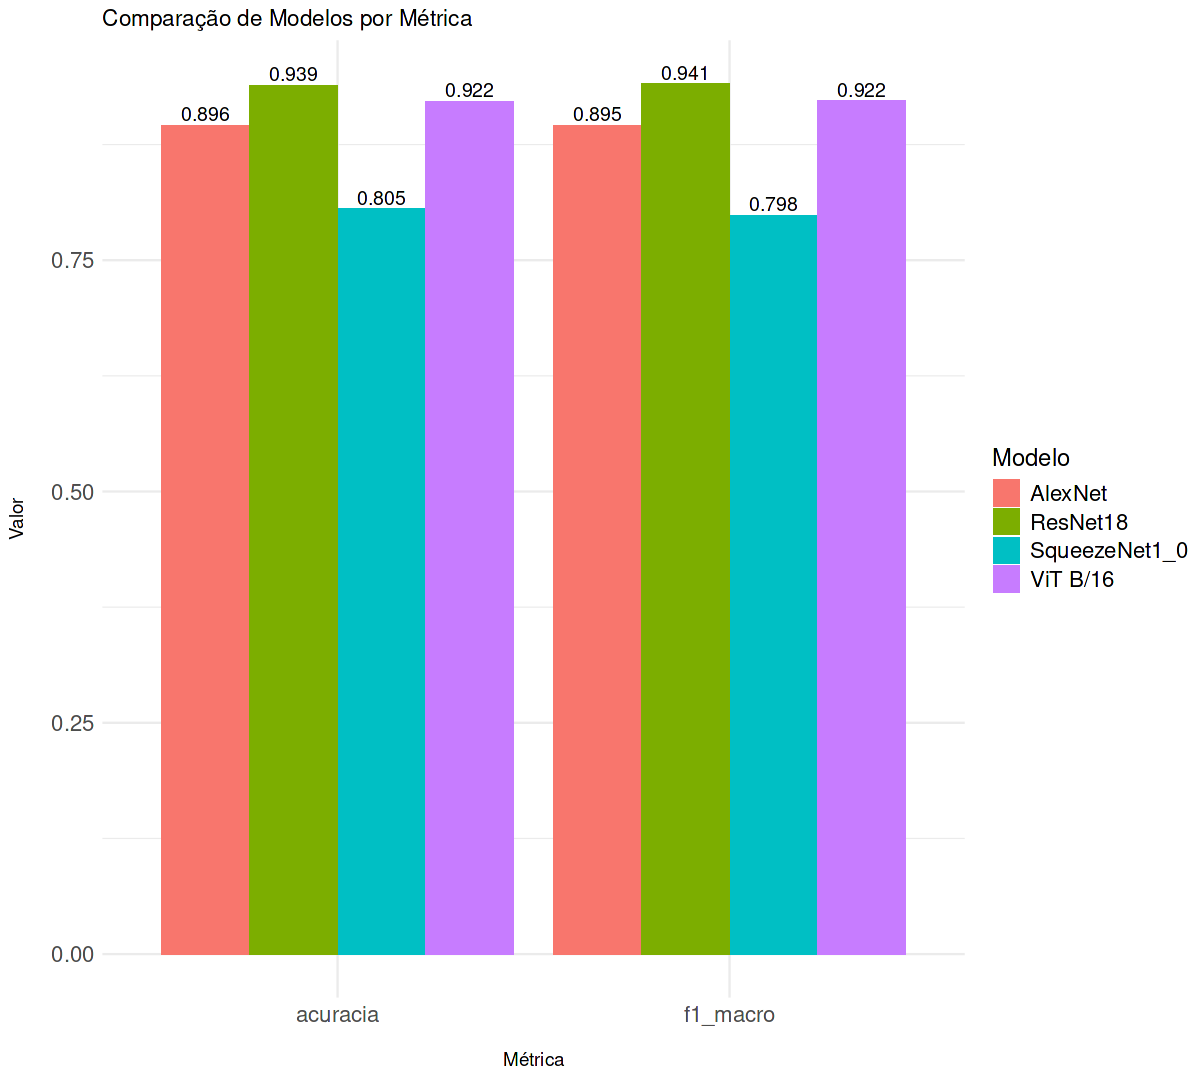

In [75]:
# Gráfico invertido (x = métrica, cor = modelo)
ggplot(resultados_long, aes(x = metrica, y = valor, fill = modelo)) +
    geom_col(position = position_dodge(width = 0.9)) +
    geom_text(aes(label = sprintf("%.3f", valor)),
             position = position_dodge(width = 0.9),
             vjust = -0.3, size = 4) +
    theme_minimal() +
    labs(title = "Comparação de Modelos por Métrica",
        x = "\nMétrica", y = "Valor\n", fill = "Modelo") +
    theme(
        axis.text.x = element_text(size = 13), # tamanho da fonte de eixo x
        axis.text.y = element_text(size = 13), # tamanho da fonte do eixo y
        legend.text = element_text(size = 13), # tamanho da fonte da legenda
        legend.title = element_text(size = 14) # tamanho do título da legenda
    )